## Life Expectancy and Gross Domestic Product Visualization

**Since World War II recovery in the early 1950, Life Expectancy which is the measure of how long one is expected to leave has been overall improving around the world. In this project, the life expectancy and Gross Domestic Product (GDP) for a sample of countries are visualized to see some of changes over a 16 year period 2000 to 2015. Area of focus here are listed below:**

- Want to know a country’s life expectancy relative to GDP.
- Analyze both trend life expectancy and GPD over the sisteen-year period from 2000 to 2015.
- How each country profiled in the given dataset compares in terms of life expectancy and GDP?
- What is the global average life expectancy and GDP for the countries?


## Step 1: Setup Needed Libraries Area

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm


## step 2: File Import, Cleansing and Description

In [2]:
# load the dataset containing the life expectancy and GDP data points
lifexpectancy_gdp_df = pd.read_csv('all_data.csv')
lifexpectancy_gdp_df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Inspect the content of the entire file
lifexpectancy_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
# Need to change year dtype to object for this analysis
lifexpectancy_gdp_df['Year'] = lifexpectancy_gdp_df['Year'].astype(int).astype(str)

In [5]:
# Statistical summary 
lifexpectancy_gdp_df.describe(include='object')

,Country,Year
count,96,96
unique,6,16
top,Germany,2007
freq,16,6


In [6]:
# Overview of variables relationships
data_points_correlation = lifexpectancy_gdp_df.corr()
print(data_points_correlation)

                                  Life expectancy at birth (years)       GDP
Life expectancy at birth (years)                          1.000000  0.343207
GDP                                                       0.343207  1.000000


## Step 3: Exploratory Data Analysis 

---
### Global Average Life Expectancy and GDP for the Sample Countries?

In [7]:
# Statistical summary 
lifexpectancy_gdp_df.describe()

,Life expectancy at birth (years),GDP
count,96.000000,9.600000e+01
mean,72.789583,3.880499e+12
std,10.672882,5.197561e+12
min,44.300000,4.415703e+09
25%,74.475000,1.733018e+11
50%,76.750000,1.280220e+12
75%,78.900000,4.067510e+12
max,81.000000,1.810000e+13


In [8]:
# Statistical summary of the data points grouped by year
lifexpectancy_gdp_df.groupby('Year').describe()

Life expectancy at birth (years)                                      \
                                count       mean        std   min     25%   
Year                                                                        
2000                              6.0  70.766667  12.344499  46.0  72.475   
2001                              6.0  70.833333  12.692938  45.3  72.900   
2002                              6.0  70.950000  12.979330  44.8  73.275   
2003                              6.0  71.033333  13.152592  44.5  73.575   
2004                              6.0  71.300000  13.377743  44.3  73.975   
2005                              6.0  71.483333  13.316969  44.6  74.250   
2006                              6.0  71.950000  13.159293  45.4  74.600   
2007                              6.0  72.300000  12.743940  46.6  74.800   
2008                              6.0  72.666667  12.178615  48.2  74.775   
2009                              6.0  73.066667  11.478792  50.0  75.100   
2010                              6.0  73.483333  10.524527  52.4  75.150   
2011                              6.0  74.200000   9.678843  54.9  75.425   
2012                              6.0  74.600000   9.047210  56.6  75.625   
2013                              6.0  74.966667   8.538072  58.0  75.850   
2014                              6.0  75.316667   8.147985  59.2  76.000   
2015                              6.0  75.716667   7.619033  60.7  76.250   

                            GDP                                            \
        50%     75%   max count          mean           std           min   
Year                                                                        
2000  75.80  77.175  78.0   6.0  2.371583e+12  3.951878e+12  6.689958e+09   
2001  75.95  77.200  78.3   6.0  2.448752e+12  4.062290e+12  6.777385e+09   
2002  76.00  77.600  78.4   6.0  2.561221e+12  4.211437e+12  6.342116e+09   
2003  76.10  77.725  78.5   6.0  2.743446e+12  4.396380e+12  5.727592e+09   
2004  76.45  77.875  79.1   6.0  2.991647e+12  4.689670e+12  5.805598e+09   
2005  76.40  78.175  79.2   6.0  3.207074e+12  4.981507e+12  5.755215e+09   
2006  76.80  78.625  79.6   6.0  3.463349e+12  5.268510e+12  5.443896e+09   
2007  77.05  78.700  79.8   6.0  3.785750e+12  5.474100e+12  5.291950e+09   
2008  76.90  79.250  79.9   6.0  4.055986e+12  5.547122e+12  4.415703e+09   
2009  77.10  79.100  80.0   6.0  4.000653e+12  5.476381e+12  8.621574e+09   
2010  77.15  79.000  80.1   6.0  4.299587e+12  5.729365e+12  1.014186e+10   
2011  77.40  79.525  80.5   6.0  4.710965e+12  5.999836e+12  1.209845e+10   
2012  77.55  79.625  80.6   6.0  4.962082e+12  6.356553e+12  1.424249e+10   
2013  77.75  79.800  80.6   6.0  5.269258e+12  6.638522e+12  1.545177e+10   
2014  77.85  80.000  80.9   6.0  5.558059e+12  6.988274e+12  1.589105e+10   
2015  78.00  80.200  81.0   6.0  5.658565e+12  7.358029e+12  1.630467e+10   

                                                              
               25%           50%           75%           max  
Year                                                          
2000  2.293077e+11  9.474990e+11  1.765300e+12  1.030000e+13  
2001  2.344109e+11  1.032052e+12  1.797838e+12  1.060000e+13  
2002  2.376926e+11  1.106055e+12  1.926992e+12  1.100000e+13  
2003  2.350536e+11  1.186787e+12  2.294370e+12  1.150000e+13  
2004  2.669748e+11  1.362809e+12  2.603275e+12  1.230000e+13  
2005  3.088102e+11  1.576158e+12  2.717550e+12  1.310000e+13  
2006  3.574112e+11  1.858706e+12  2.939870e+12  1.390000e+13  
2007  3.910720e+11  2.241710e+12  3.524122e+12  1.450000e+13  
2008  4.100485e+11  2.426825e+12  4.386750e+12  1.470000e+13  
2009  3.530290e+11  2.156480e+12  4.686965e+12  1.440000e+13  
2010  4.266860e+11  2.234110e+12  5.429738e+12  1.500000e+13  
2011  4.819865e+11  2.464445e+12  6.618838e+12  1.550000e+13  
2012  4.969915e+11  2.365290e+12  7.306408e+12  1.620000e+13  
2013  5.242830e+11  2.507245e+12  8.143542e+12  1.670000e+13  
2014  

Key observations:
- The mean for both life expectancy and GPD increased each year.
- lowest minimum noted in 2004 for life expectancy (44.3) and in 2010 for GDP (1.014).

---
### Average Life Expectancy and GPD for Each Country Over 16 Years 

In [9]:
# Statistical summary of the data points grouped by country
lifexpectancy_gdp_df.groupby('Country').describe()

Life expectancy at birth (years)                      \
                                                    count      mean       std   
Country                                                                         
Chile                                                16.0  78.94375  1.058911   
China                                                16.0  74.26250  1.318016   
Germany                                              16.0  79.65625  0.975000   
Mexico                                               16.0  75.71875  0.620987   
United States of America                             16.0  78.06250  0.832566   
Zimbabwe                                             16.0  50.09375  5.940311   

                                                              GDP  \
                           min     25%    50%     75%   max count   
Country                                                             
Chile                     77.3  77.975  79.00  79.825  80.5  16.0   
China                     71.7  73.400  74.45  75.250  76.1  16.0   
Germany                   78.0  78.950  79.85  80.525  81.0  16.0   
Mexico                    74.8  75.225  75.65  76.150  76.7  16.0   
United States of America  76.8  77.425  78.15  78.725  79.3  16.0   
Zimbabwe                  44.3  45.175  47.40  55.325  60.7  16.0   

                                                                    \
                                  mean           std           min   
Country                                                              
Chile                     1.697888e+11  7.687884e+10  6.973681e+10   
China                     4.957714e+12  3.501096e+12  1.211350e+12   
Germany                   3.094776e+12  6.674862e+11  1.949950e+12   
Mexico                    9.766506e+11  2.095716e+11  6.836480e+11   
United States of America  1.407500e+13  2.432694e+12  1.030000e+13   
Zimbabwe                  9.062580e+09  4.298310e+09  4.415703e+09   

                                                                    \
                                   25%           50%           75%   
Country                                                              
Chile                     9.387303e+10  1.729975e+11  2.449515e+11   
China                     1.881585e+12  4.075195e+12  7.819550e+12   
Germany                   2.740870e+12  3.396350e+12  3.596078e+12   
Mexico                    7.630910e+11  1.004376e+12  1.156992e+12   
United States of America  1.210000e+13  1.445000e+13  1.567500e+13   
Zimbabwe                  5.748309e+09  6.733671e+09  1.263446e+10   

                                        
                                   max  
Country                                 
Chile                     2.783840e+11  
China                     1.106470e+13  
Germany                   3.890610e+12  
Mexico                    1.298460e+12  
United States of America  1.810000e+13  
Zimbabwe                  1.630467e+10

Text(0.5, 1.0, 'Spread of Life Expectancy at Birth (years)')

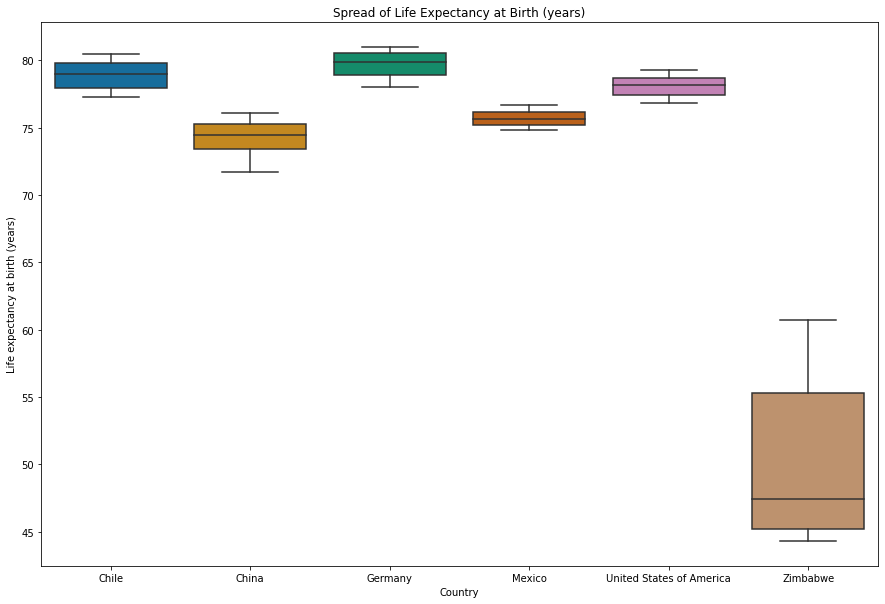

In [10]:
# Visualization Average Life Expectancy for Each Country Over 16 Years
plt.figure(figsize=(15, 10))
#sns.set_theme(style='dark')
#sns.color_palette("tab10")
sns.color_palette("icefire", as_cmap=True)
sns.boxplot(data=lifexpectancy_gdp_df, x='Country', 
            y='Life expectancy at birth (years)',
            palette='colorblind')
plt.title('Spread of Life Expectancy at Birth (years)')

Chile and Germany hold highest life expectancy which is in the upper 70 of the countries in the group. The lowest of all countries Zimbabwe's life expectancy is in the mid 50; the people are not expected to leave past 55 years of age.   

Text(0.5, 1.0, 'GDP Spread for Country Sample')

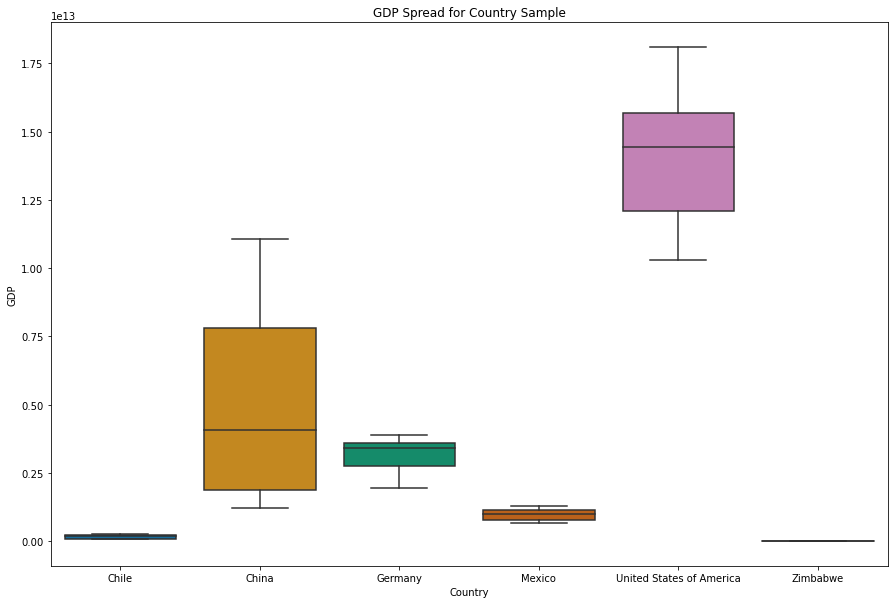

In [11]:
# Visualization of Average GPD for Each Country Over 16 Years
plt.figure(figsize=(15, 10))
#sns.set_theme(style='dark')
#sns.color_palette('tab10')
sns.color_palette("icefire", as_cmap=True)
sns.boxplot(data=lifexpectancy_gdp_df, x='Country', 
            y='GDP', palette='colorblind')
plt.title('GDP Spread for Country Sample')

United States of America's (USA) has the highest GDP whereby China has the widest variations and the second largest GDP of the sample countries. 

---
### Aggregate Level Analyze of Life Expectancy and GPD Trend from 2000 to 2015.

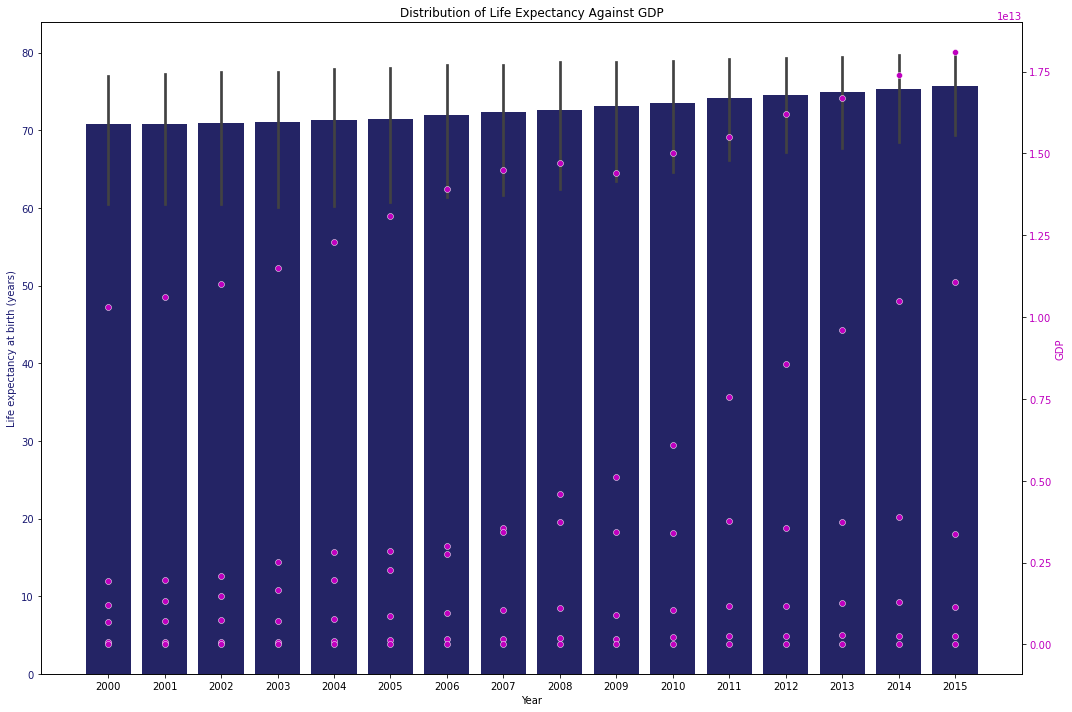

In [12]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1_color = 'midnightblue'
#ax1.set_xlabel('Year')
ax1.set_ylabel('Life Expectancy', color=ax1_color)

#sns.lineplot(data=lifexpectancy_gdp_df, x='Year', y='Life expectancy at birth (years)', color=ax1_color)
#sns.scatterplot(data=lifexpectancy_gdp_df, x='Year', y='Life expectancy at birth (years)', color=ax1_color)
sns.barplot(data=lifexpectancy_gdp_df, x='Year', y='Life expectancy at birth (years)', color=ax1_color)

ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()


ax2_color = 'm'

#sns.lineplot(data=lifexpectancy_gdp_df, x='Year', y='GDP', color=ax2_color)
sns.scatterplot(data=lifexpectancy_gdp_df, x='Year', y='GDP', color=ax2_color)

ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylabel('GDP', color=ax2_color)

plt.title('Distribution of Life Expectancy Against GDP')

fig.tight_layout()
plt.show()

### Life Expectancy and GDP by Country.

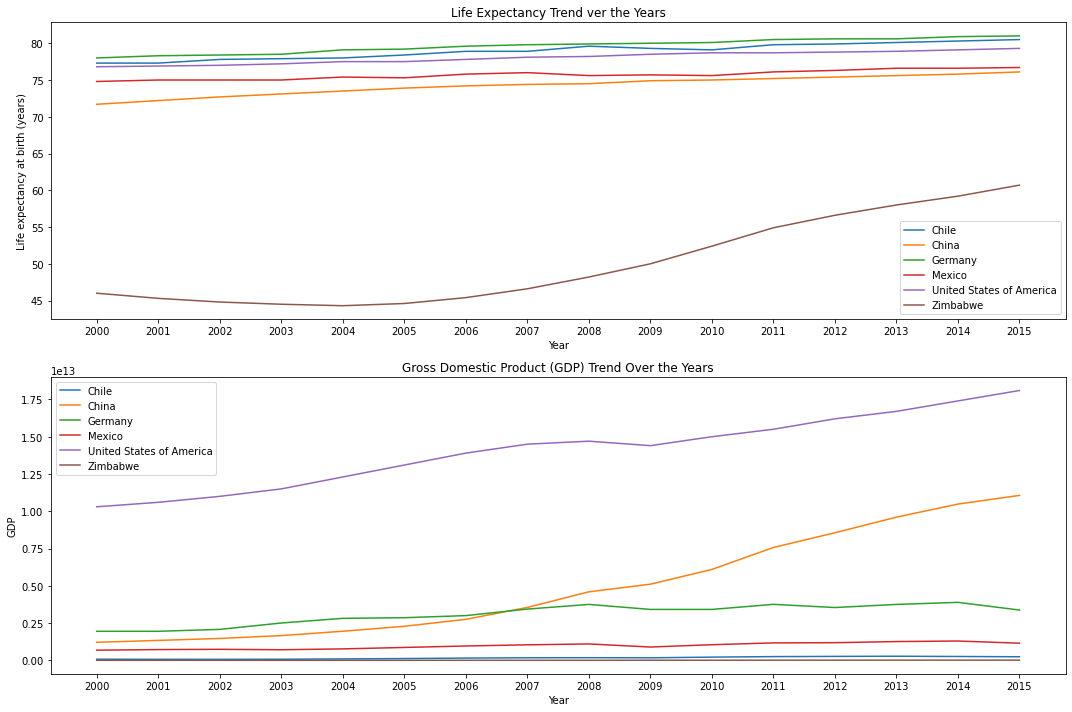

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(211)

ax1_color = 'blue'
sns.lineplot(data=lifexpectancy_gdp_df, x='Year', 
             y='Life expectancy at birth (years)', 
             color=ax1_color, hue='Country')

plt.title('Life Expectancy Trend ver the Years')
plt.legend(loc='best')



plt.subplot(212)

ax2_color = 'green'
sns.lineplot(data=lifexpectancy_gdp_df, x='Year', 
             y='GDP', color=ax2_color, hue='Country')
plt.title('Gross Domestic Product (GDP) Trend Over the Years')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Zimbabwe is lagging in both life expectancy and GDP, while the other countries in the sample projected life expectancy and GDP outputs increased year over year Zimbabwe' GDP stayed flat, but life expectancy of its people started to positively to trend upward in 2006.   

Key takeaway:
- A country's GDP may not be a determining factor of its life expectancy projections. Chile has a life expectancy almost 30 years greater than Zimbabwe while its GDP is closely aligned to Zimbabwe's GDP. 

Text(0.5, 1.0, 'Distribution of Life Expectancy Over the Years')

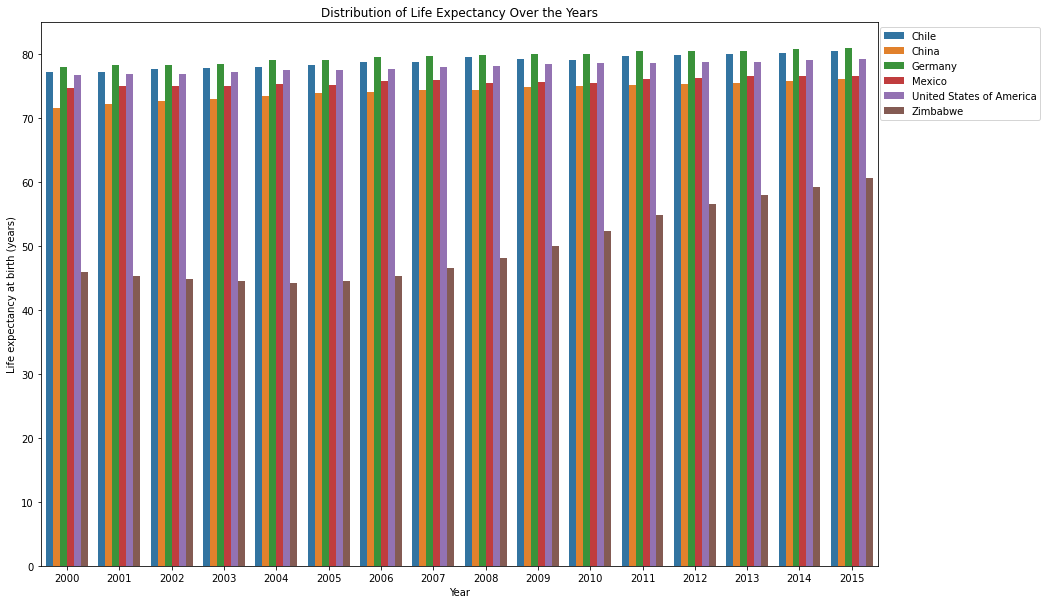

In [14]:
# Visualization of Life Expectancy Trend with a bar plot 
plt.figure(figsize=(15, 10))
#sns.set_theme(style='dark')
sns.color_palette('icefire')
#sns.color_palette('tab10', as_cmap=True)
sns.barplot(data=lifexpectancy_gdp_df, x='Year', 
            y='Life expectancy at birth (years)',
            hue='Country')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Life Expectancy Over the Years')

Text(0.5, 1.0, 'Distribution of GDP Over the Years')

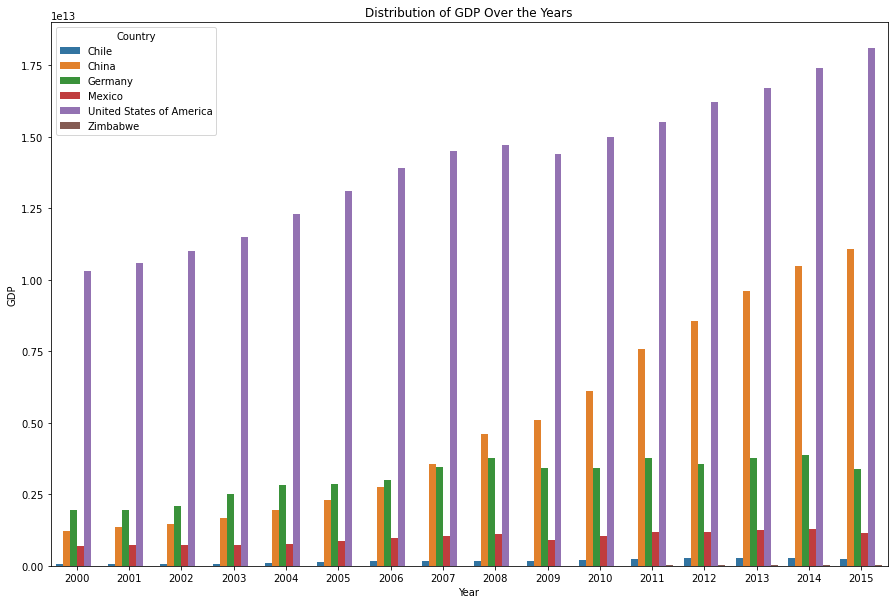

In [15]:
# Visualization of GDP Trend with a bar plot
plt.figure(figsize=(15, 10))
#sns.color_palette('tab10')
sns.color_palette('icefire', as_cmap=True)
sns.barplot(data=lifexpectancy_gdp_df, x='Year', 
            y='GDP', hue='Country')
plt.title('Distribution of GDP Over the Years')

United States of America's (USA) GDP is unmatched. China is the only country that comes close to USA GDP performance. China's GDP grew year over year from 2000 while Germany's GDP fluctuated over the years and the other countries (Chile, Mexico, Zimbabwe) stayed close to flat. 

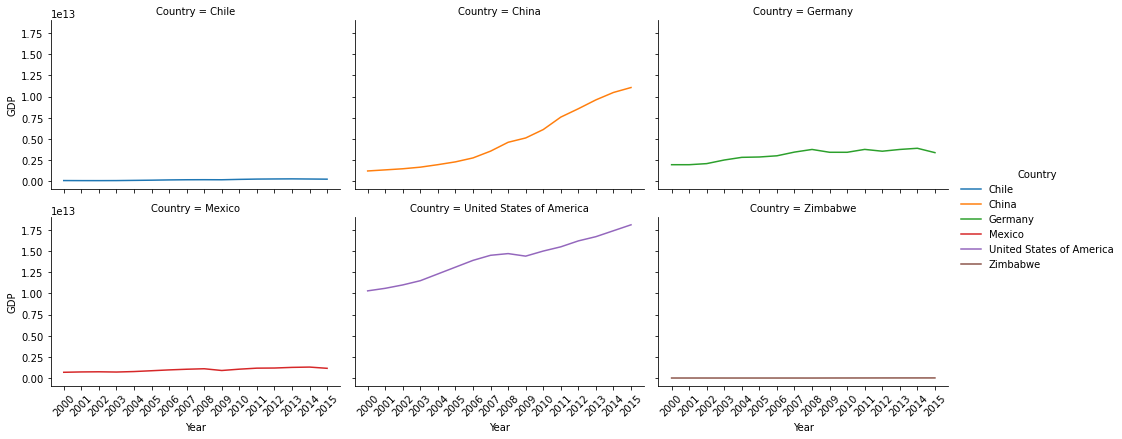

In [16]:
g = sns.FacetGrid(lifexpectancy_gdp_df, hue='Country', 
                  col='Country', col_wrap=3, height=3, aspect=1.5)
g.map(sns.lineplot, 'Year', 'GDP')

g.set_xticklabels(rotation=45)

g.add_legend()

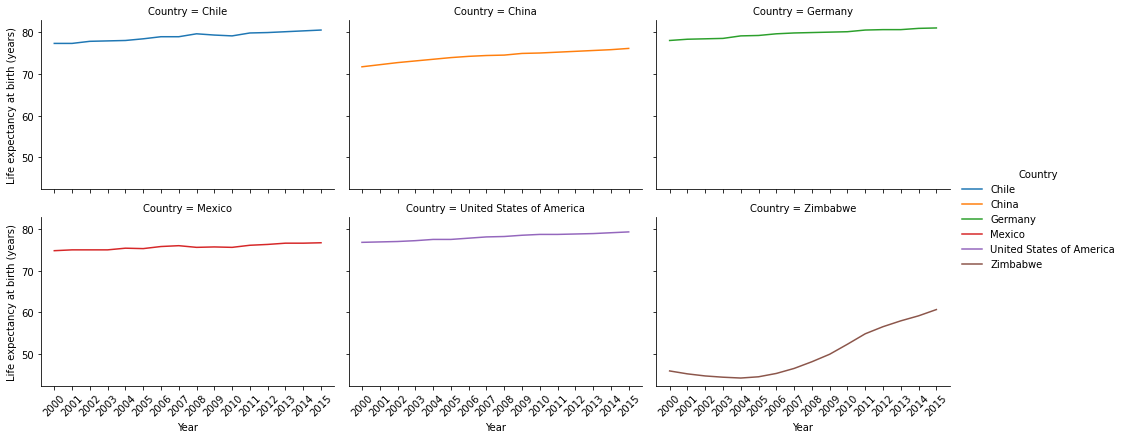

In [17]:
g = sns.FacetGrid(lifexpectancy_gdp_df, hue='Country', 
                  col='Country', col_wrap=3, height=3, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Life expectancy at birth (years)')

g.set_xticklabels(rotation=45)

g.add_legend()

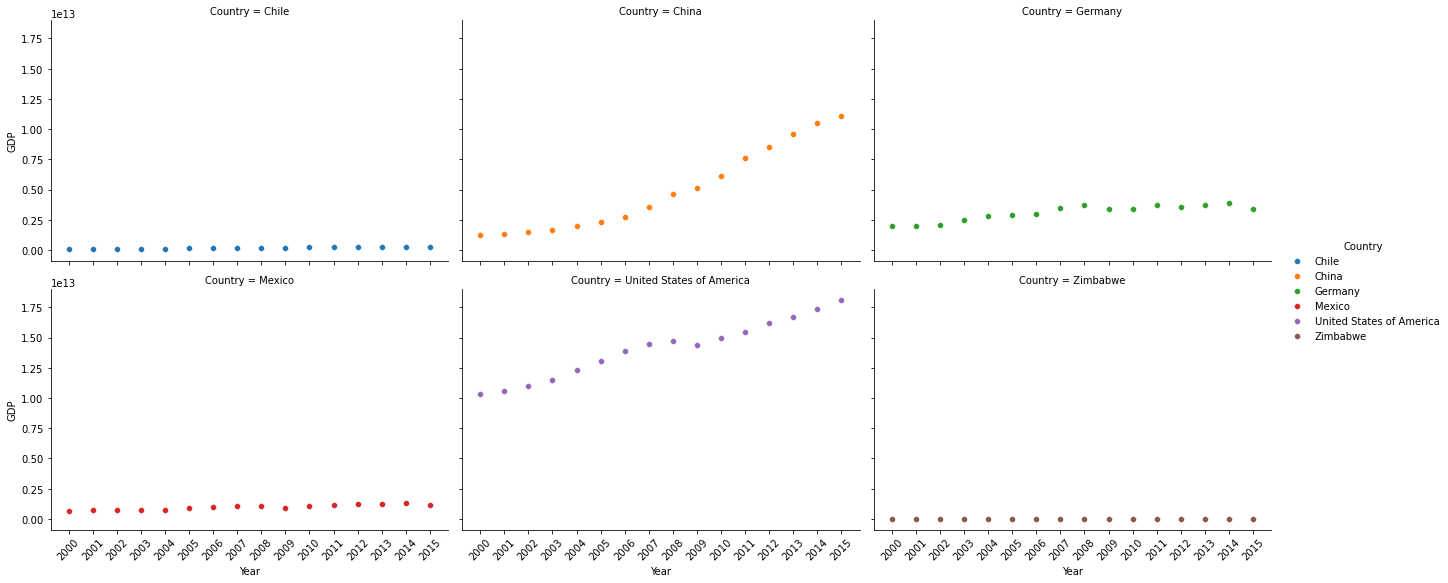

In [18]:
g = sns.FacetGrid(lifexpectancy_gdp_df, hue='Country', 
                  col='Country', col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, 'Year', 'GDP')

g.set_xticklabels(rotation=45)

g.add_legend()

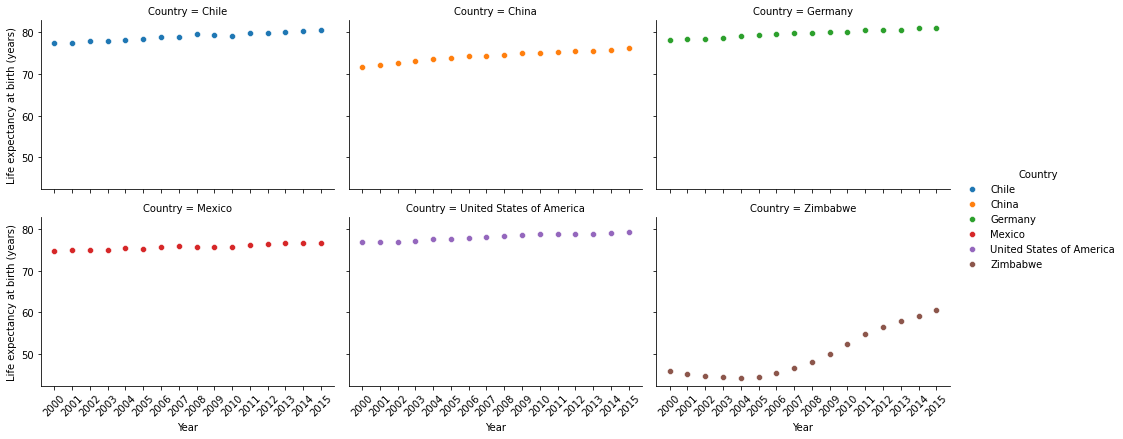

In [19]:
g = sns.FacetGrid(lifexpectancy_gdp_df, hue='Country', 
                  col='Country', col_wrap=3, height=3, aspect=1.5)
g.map(sns.scatterplot, 'Year', 'Life expectancy at birth (years)')

g.set_xticklabels(rotation=45)

g.add_legend()

### Sources:



https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py

https://seaborn.pydata.org/examples/timeseries_facets.html

https://seaborn.pydata.org/examples/regression_marginals.html

https://seaborn.pydata.org/examples/scatter_bubbles.html


plt.figure(figsize=(15, 10))
#sns.color_palette("tab10")
#sns.color_palette("icefire", as_cmap=True)
sns.relplot(data=lifexpectancy_gdp_df, x='Year', 
            y='GDP', hue='Country', style='Country', 
            size='GDP', sizes=(40, 400), 
            alpha=.5, height=6, aspect=2)
